In [1]:
import h5py
import galaxychop as gchop
import uttr
import attr
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# Read Galaxy

In [2]:
gal = gchop.read_hdf5("../galaxy-chop/tests/datasets/gal394242.h5")

In [3]:
galc = gchop.center(gal)
gal = gchop.star_align(gchop.center(gal))

In [4]:
gal.to_dataframe()

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,5.224283e+05,-0.054824,-0.063223,-0.260845,5.949678,22.550460,-6.055106,0.0,-195699.620206,290.293111,-195409.327095,6.264991,-1.883910,-0.860159
1,stars,0,9.745897e+05,-0.161120,-0.127723,-0.177528,21.909445,8.321999,-0.535136,0.0,-196176.962277,274.782915,-195902.179362,1.545736,-3.975758,1.457514
2,stars,0,6.935776e+05,-0.256088,-0.165705,-0.196836,-9.493458,7.263093,15.637166,0.0,-195152.120168,193.699612,-194958.420557,-1.161512,5.873138,-3.433097
3,stars,0,1.070959e+06,-0.235092,-0.256281,-0.369501,-9.675913,-5.471289,-0.817244,0.0,-194695.767625,62.113089,-194633.654536,-1.812200,3.383127,-1.193495
4,stars,0,6.013803e+05,-0.076621,-0.199932,-0.282408,16.533770,8.094719,-17.010778,0.0,-195703.942688,314.128285,-195389.814402,5.687005,-5.972652,2.685397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57279,gas,2,1.400046e+06,-2.245883,2.358065,-8.389589,-18.031673,34.561220,-269.322856,0.0,-129252.826165,37027.209909,-92225.616256,-345.126246,-453.589180,-35.100593
57280,gas,2,1.375867e+06,-1.333431,2.056292,8.098147,-3.554033,-10.650944,275.247567,0.0,-129835.893336,37943.648417,-91892.244919,652.242363,338.242612,21.510432
57281,gas,2,9.908498e+05,-9.278659,-0.275191,2.774880,-147.978426,-203.402319,73.776431,0.0,-132966.102621,34356.539847,-98609.562774,544.114355,273.923985,1846.578340
57282,gas,2,1.456959e+06,-5.980264,5.097995,4.875443,-192.738278,87.675395,217.206835,0.0,-132205.106762,46006.913910,-86198.192853,679.862938,359.269707,458.256750


## [ Scatter ] 

## Stars

Text(0, 0.5, 'Z [Kpc]')

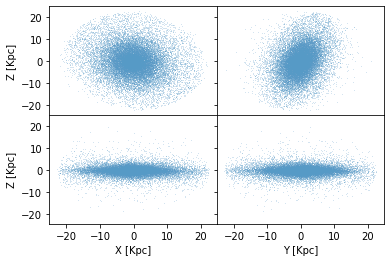

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(wspace=0, hspace=0)
ax1 = galc.plot.scatter("x","z", alpha=.5, s=0.5, ptypes=['stars'], ax=ax1)
ax2 = galc.plot.scatter("y","z", alpha=.5, s=0.5, ptypes=['stars'], ax=ax2)
ax3 = gal.plot.scatter("x","z", alpha=.5, s=0.5, ptypes=['stars'],  ax=ax3)
ax4 = gal.plot.scatter("y","z", alpha=.5, s=0.5, ptypes=['stars'],  ax=ax4)
#legend=False,
ax4.set_xlabel('Y [Kpc]')
ax3.set_xlabel('X [Kpc]')
ax3.set_ylabel('Z [Kpc]')
ax1.set_ylabel('Z [Kpc]')

#plt.savefig('gchop_plots/pos_plane_stars.png', dpi=100)

## All particels

Text(0, 0.5, 'Z [Kpc]')

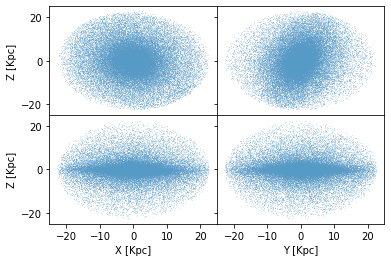

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(wspace=0, hspace=0)
ax1 = galc.plot.scatter("x","z", alpha=.5, s=0.5, ax=ax1)
ax2 = galc.plot.scatter("y","z", alpha=.5, s=0.5, ax=ax2)
ax3 = gal.plot.scatter("x","z", alpha=.5, s=0.5,  ax=ax3)
ax4 = gal.plot.scatter("y","z", alpha=.5, s=0.5,  ax=ax4)
#legend=False,
ax4.set_xlabel('Y [Kpc]')
ax3.set_xlabel('X [Kpc]')
ax3.set_ylabel('Z [Kpc]')
ax1.set_ylabel('Z [Kpc]')

#plt.savefig('gchop_plots/pos_plane.png', dpi=100)

## [ PairPlots ]

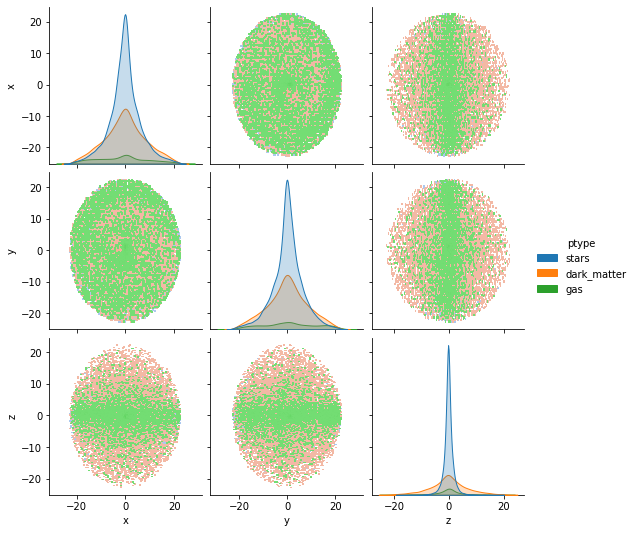

In [7]:
gal.plot.pairplot()

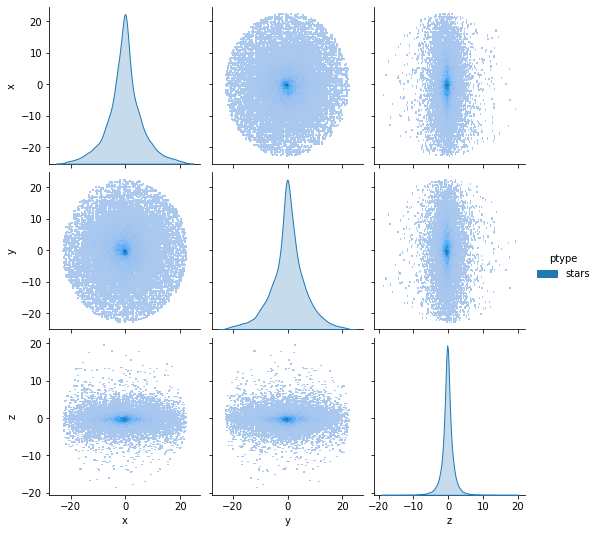

In [8]:
gal.plot.pairplot(labels='ptype', ptypes=['stars'])

## [KDE]

<AxesSubplot:xlabel='x', ylabel='y'>

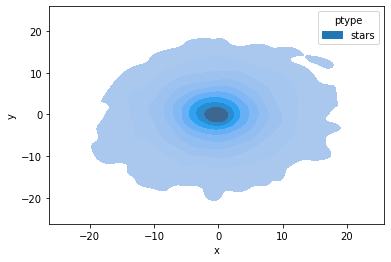

In [9]:
gal.plot.kde("x", "y", labels='ptype', ptypes=['stars'], fill=True)

<AxesSubplot:xlabel='x', ylabel='y'>

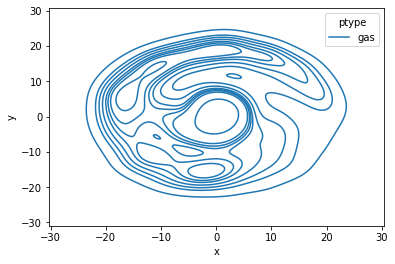

In [10]:
gal.plot.kde("x", "y", labels='ptype', ptypes=['gas'])

<AxesSubplot:xlabel='x', ylabel='y'>

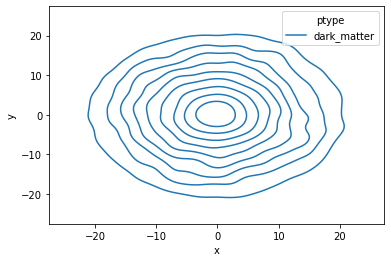

In [11]:
gal.plot.kde("x", "y", labels='ptype', ptypes=['dark_matter'])

## [ Hist ]

<AxesSubplot:xlabel='x', ylabel='y'>

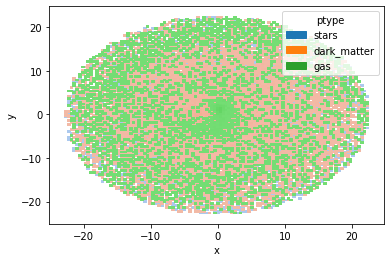

In [12]:
gal.plot.hist("x","y", labels='ptype')

<AxesSubplot:xlabel='x', ylabel='y'>

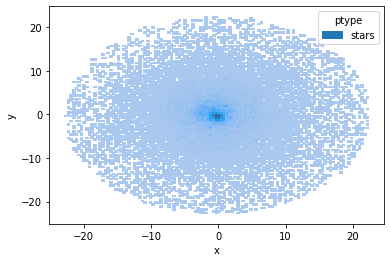

In [13]:
gal.plot.hist("x", "y", labels='ptype', ptypes=['stars'])

# Read model labels

In [14]:
df = pd.read_pickle('df_stars.pkl')
#df = pd.read_pickle('df_stars_gal394242_rvir.pkl')

In [15]:
df

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,...,lab_th,lab_ab,lab_cr,lab_km,lab_km3,lab_km4,lab_gmm,lab_gmm3,lab_gmm4,lab_agmm
0,stars,0,5.224283e+05,-0.054824,-0.063223,-0.260845,5.949678,22.550460,-6.055106,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0
1,stars,0,9.745897e+05,-0.161120,-0.127723,-0.177528,21.909445,8.321999,-0.535136,0.0,...,0.0,1.0,1.0,0.0,2.0,3.0,0.0,2.0,1.0,1.0
2,stars,0,6.935776e+05,-0.256088,-0.165705,-0.196836,-9.493458,7.263093,15.637166,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0
3,stars,0,1.070959e+06,-0.235092,-0.256281,-0.369501,-9.675913,-5.471289,-0.817244,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0
4,stars,0,6.013803e+05,-0.076621,-0.199932,-0.282408,16.533770,8.094719,-17.010778,0.0,...,0.0,0.0,1.0,0.0,2.0,3.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32062,stars,0,1.343808e+06,15.394374,-13.615094,0.149480,249.650695,244.472680,-41.765153,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
32063,stars,0,7.382408e+05,-7.436244,16.466565,-0.735001,-267.224099,281.248845,-52.902787,0.0,...,0.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0
32064,stars,0,6.786477e+05,15.171295,-10.470204,-6.430860,-353.009725,159.227328,-72.137340,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0
32065,stars,0,8.290853e+05,14.695170,15.612993,-5.270562,-4.742671,263.201137,314.186911,0.0,...,0.0,1.0,1.0,1.0,2.0,3.0,0.0,1.0,2.0,1.0


<AxesSubplot:xlabel='x', ylabel='y'>

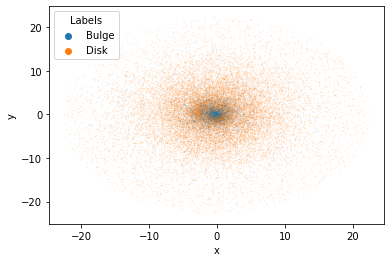

In [16]:
gal.plot.scatter("x", "y", marker='.', linewidth=0, s=4, alpha=0.2, 
                 ptypes=['stars'], labels = df.lab_ab, lmap={0: 'Bulge', 1: 'Disk'})

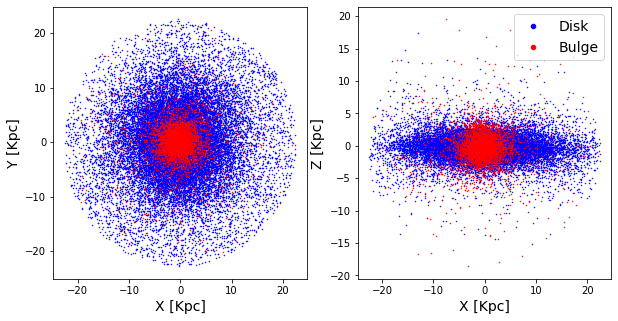

In [17]:
xx = gal.stars.x.value
yy = gal.stars.y.value
zz = gal.stars.z.value
labels_ab = df.lab_ab
mask_b = np.where(labels_ab == 0)[0]
mask_d = np.where(labels_ab == 1)[0]

fig, ax = plt.subplots(1,2, figsize=[10, 5])

ax[0].plot(xx[mask_d], yy[mask_d], '.', color='blue', ms=1, label='Disk')
ax[0].plot(xx[mask_b], yy[mask_b], '.', color='red', ms=1, label='Bulge')
ax[0].set_xlabel('X [Kpc]', fontsize=14)
ax[0].set_ylabel('Y [Kpc]', fontsize=14)


ax[1].plot(xx[mask_d], zz[mask_d], '.', color='blue', ms=1, label='Disk')
ax[1].plot(xx[mask_b], zz[mask_b], '.', color='red', ms=1, label='Bulge')
ax[1].set_xlabel('X [Kpc]', fontsize=14)
ax[1].set_ylabel('Z [Kpc]', fontsize=14)

ax[1].legend(markerscale=9., fontsize=14)
#plt.savefig('gchop_plots/xyz_lab_ab.png', dpi=100)